# Exploratory Data Analysis

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Advertising

In [65]:
df_ads = pd.read_csv('/home/marketing-analytics/datasets/advertising.csv')

In [66]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102050 entries, 0 to 102049
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ad_id        102050 non-null  object 
 1   platform     96925 non-null   object 
 2   date         102050 non-null  object 
 3   impressions  102050 non-null  int64  
 4   clicks       102050 non-null  int64  
 5   cost_usd     102050 non-null  float64
 6   conversions  102050 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.5+ MB


In [67]:
# Function to display basic information
def inspect_dataframe(df, name):
    print(f"--- {name} Dataset ---")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Data Types:\n", df.dtypes)
    print("Missing Values:\n", df.isnull().sum())
    print("\n")

In [68]:
inspect_dataframe(df_ads, 'Advertising')

--- Advertising Dataset ---
Shape: (102050, 7)
Columns: ['ad_id', 'platform', 'date', 'impressions', 'clicks', 'cost_usd', 'conversions']
Data Types:
 ad_id           object
platform        object
date            object
impressions      int64
clicks           int64
cost_usd       float64
conversions      int64
dtype: object
Missing Values:
 ad_id             0
platform       5125
date              0
impressions       0
clicks            0
cost_usd          0
conversions       0
dtype: int64




In [69]:
df_ads.describe()

,impressions,clicks,cost_usd,conversions
count,102050.000000,102050.000000,102050.000000,102050.000000
mean,5096.450279,243.046173,2444.638562,48.144645
std,13462.310883,203.881182,2013.212165,34.651454
min,-10000.000000,-500.000000,-4998.890000,-100.000000
25%,2433.000000,118.000000,1204.555000,23.000000
50%,4972.500000,246.000000,2470.010000,49.000000
75%,7455.000000,373.000000,3733.315000,75.000000
max,993587.000000,9204.000000,96655.840000,994.000000


In [70]:
# Remove negative values
numeric_cols = ['impressions', 'clicks', 'cost_usd', 'conversions']
for col in numeric_cols:
    df_ads = df_ads[df_ads[col] >= 0]

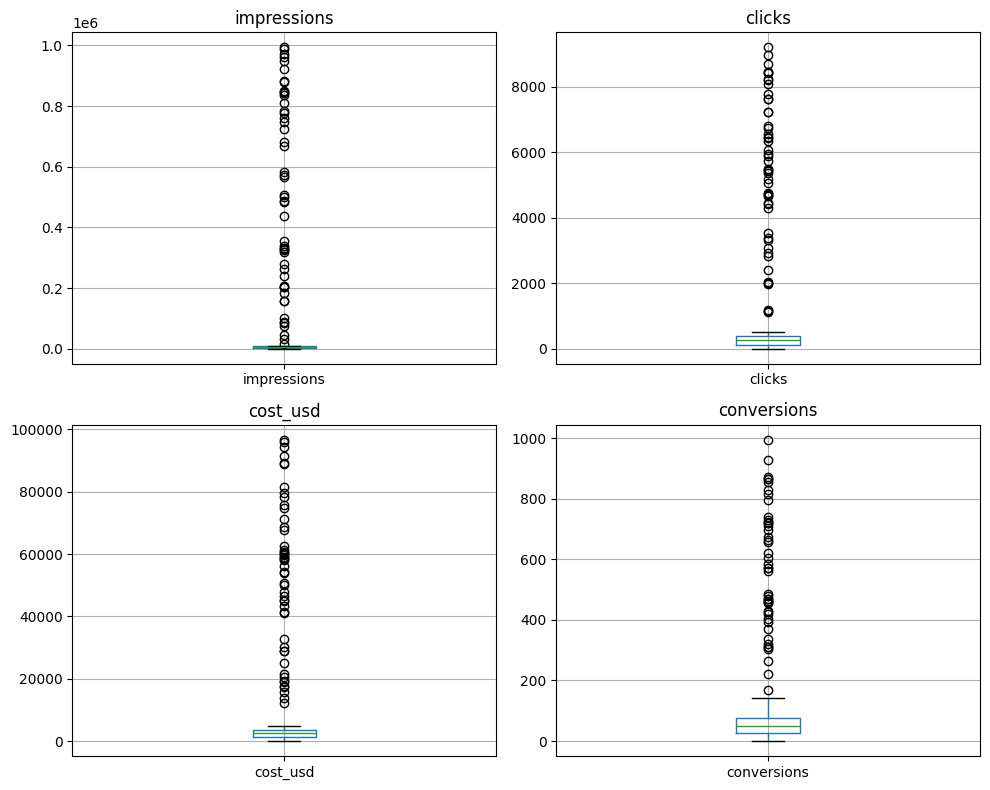

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes = axes.flatten()

for i, column in enumerate(numeric_cols):
    df_ads[[column]].boxplot(ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

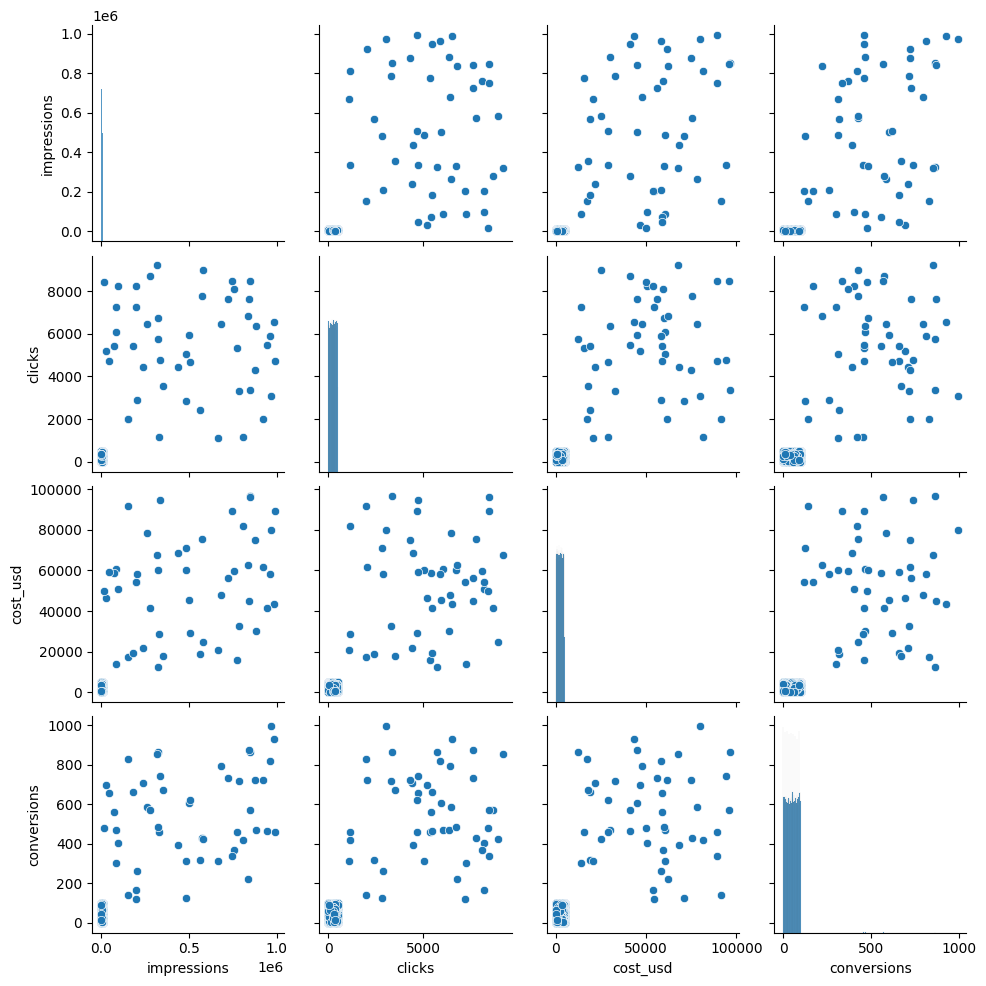

In [72]:
# Pairplot for multiple numerical variables
sns.pairplot(df_ads)
plt.show()

In [73]:
df_ads.describe()

,impressions,clicks,cost_usd,conversions
count,94053.000000,94053.000000,94053.000000,94053.000000
mean,5320.723666,253.055607,2546.429794,50.212954
std,13915.476835,194.689493,1918.093116,31.772335
min,100.000000,0.000000,50.020000,0.000000
25%,2581.000000,126.000000,1279.950000,25.000000
50%,5067.000000,251.000000,2520.460000,50.000000
75%,7503.000000,376.000000,3756.560000,75.000000
max,993587.000000,9204.000000,96655.840000,994.000000


In [74]:
df_ads['date'] = pd.to_datetime(df_ads['date'], dayfirst=True, errors='coerce')

/tmp/ipykernel_148461/515308664.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_ads['date'] = pd.to_datetime(df_ads['date'], dayfirst=True, errors='coerce')


In [75]:
df_ads['date'].head()

0   2024-07-21
1   2024-07-21
3   2024-07-21
4   2024-07-21
5   2024-07-21
Name: date, dtype: datetime64[ns]

In [76]:
df_ads.isna().sum()

ad_id             0
platform       4735
date           2688
impressions       0
clicks            0
cost_usd          0
conversions       0
dtype: int64

In [77]:
df_ads['platform'].value_counts()

platform
FB Ads           12947
Instagram Ads    12907
Google Ads       12771
LinkedIn Ads     12764
GAds             12727
Facebook Ads     12658
Insta Ads        12544
Name: count, dtype: int64

In [78]:
# Standardize Case and Strip Whitespaces
df_ads['platform'] = df_ads['platform'].astype(str).str.strip().str.lower()

In [79]:
df_ads['platform'].value_counts()

platform
fb ads           12947
instagram ads    12907
google ads       12771
linkedin ads     12764
gads             12727
facebook ads     12658
insta ads        12544
nan               4735
Name: count, dtype: int64

In [80]:
platform_mapping = {
    'instagram ads': 'Instagram',
    'linkedin ads': 'Linkedin',
    'fb ads': 'Facebook',
    'google ads': 'Google',
    'gads': 'Google',
    'insta ads': 'Instagram',
    'facebook ads': 'Facebook'
}

df_ads['platform'] = df_ads['platform'].map(platform_mapping)

In [81]:
df_ads['platform'].value_counts()

platform
Facebook     25605
Google       25498
Instagram    25451
Linkedin     12764
Name: count, dtype: int64

In [82]:
df_ads['platform'].isna().value_counts(normalize=True)

platform
False    0.949656
True     0.050344
Name: proportion, dtype: float64

In [83]:
df_ads['date'].isna().value_counts(normalize=True)

date
False    0.97142
True     0.02858
Name: proportion, dtype: float64

In [84]:
df_ads.duplicated().value_counts(normalize=True)

False    0.980256
True     0.019744
Name: proportion, dtype: float64

In [85]:
df_ads = df_ads.dropna()
df_ads = df_ads.drop_duplicates()

In [86]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85030 entries, 1 to 99146
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ad_id        85030 non-null  object        
 1   platform     85030 non-null  object        
 2   date         85030 non-null  datetime64[ns]
 3   impressions  85030 non-null  int64         
 4   clicks       85030 non-null  int64         
 5   cost_usd     85030 non-null  float64       
 6   conversions  85030 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.2+ MB


/tmp/ipykernel_148461/319053507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y=column, data=df_ads, ax=axes[i], palette="Set3")
/tmp/ipykernel_148461/319053507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y=column, data=df_ads, ax=axes[i], palette="Set3")
/tmp/ipykernel_148461/319053507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y=column, data=df_ads, ax=axes[i], palette="Set3")
/tmp/ipykernel_148461/319053507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is 

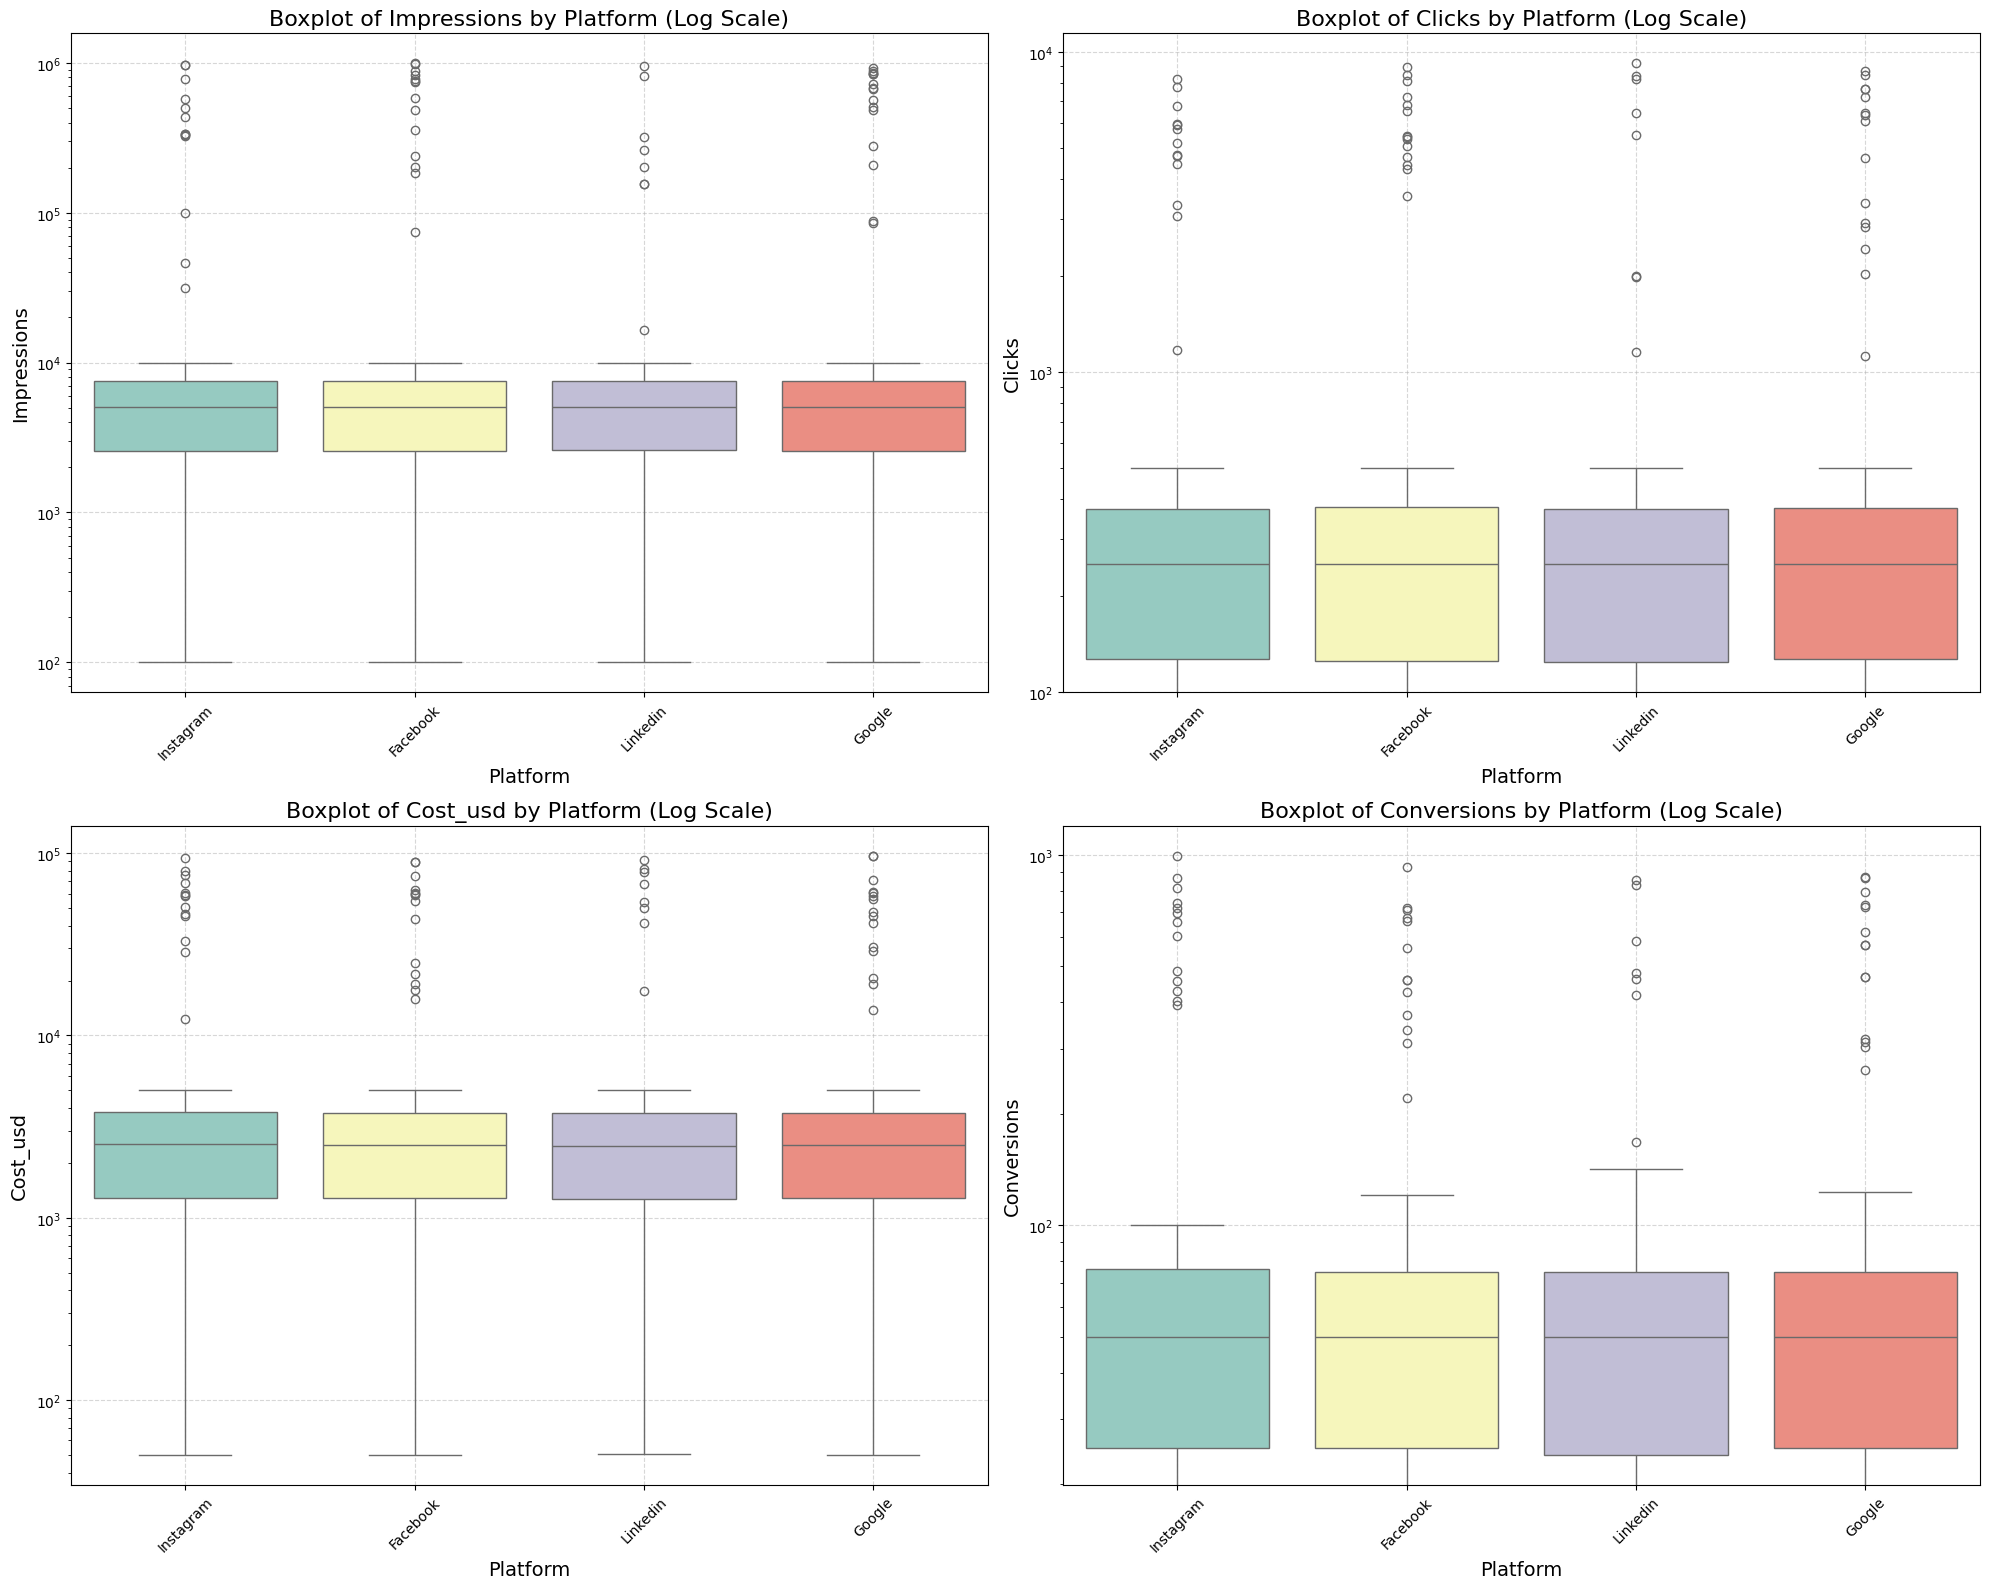

In [87]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for i, column in enumerate(numeric_cols):
    sns.boxplot(x='platform', y=column, data=df_ads, ax=axes[i], palette="Set3")
    axes[i].set_title(f'Boxplot of {column.capitalize()} by Platform (Log Scale)', fontsize=16)
    axes[i].set_xlabel('Platform', fontsize=14)
    axes[i].set_yscale('log')  # Apply log scale
    axes[i].set_ylabel(column.capitalize(), fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [88]:
total_cost_per_platform = df_ads.groupby('platform')['cost_usd'].sum().reset_index()
total_cost_per_platform.columns = ['platform', 'total cost (USD)']
total_cost_per_platform

,platform,total cost (USD)
0,Facebook,62184806.16
1,Google,61699793.25
2,Instagram,62182680.81
3,Linkedin,30835399.61


In [89]:
total_conversion_per_platform = df_ads.groupby('platform')['conversions'].sum().reset_index()
total_conversion_per_platform.columns = ['platform', 'total conversions']
total_conversion_per_platform

,platform,total conversions
0,Facebook,1221964
1,Google,1216939
2,Instagram,1223814
3,Linkedin,606242


In [90]:
avg_cost_per_platform = df_ads.groupby('platform')['cost_usd'].mean().reset_index()
avg_cost_per_platform.columns = ['platform', 'average cost']
avg_cost_per_platform

,platform,average cost
0,Facebook,2548.662083
1,Google,2545.371009
2,Instagram,2565.715498
3,Linkedin,2536.849001


In [91]:
agg_metrics = df_ads.groupby('platform').agg({
    'cost_usd': ['sum', 'mean'],
    'impressions': 'sum',
    'clicks': 'sum',
    'conversions': 'sum'
}).reset_index()

agg_metrics.columns = ['platform', 'total cost (USD)', 'average total cost (USD)',
                       'total impressions', 'total clicks', 
                       'total conversions']

In [92]:
agg_metrics

,platform,total cost (USD),average total cost (USD),total impressions,total clicks,total conversions
0,Facebook,62184806.16,2548.662083,130885075,6208438,1221964
1,Google,61699793.25,2545.371009,131213541,6158120,1216939
2,Instagram,62182680.81,2565.715498,128020130,6124082,1223814
3,Linkedin,30835399.61,2536.849001,64394994,3073644,606242


In [95]:
agg_metrics['cost per click'] = agg_metrics['total cost (USD)'] / agg_metrics['total clicks']
agg_metrics['cost per conversion'] = agg_metrics['total cost (USD)'] / agg_metrics['total conversions']

In [96]:
agg_metrics

,platform,total cost (USD),average total cost (USD),total impressions,total clicks,total conversions,cpc,cost per conversion,cost per click
0,Facebook,62184806.16,2548.662083,130885075,6208438,1221964,10.016176,50.889229,10.016176
1,Google,61699793.25,2545.371009,131213541,6158120,1216939,10.019258,50.700810,10.019258
2,Instagram,62182680.81,2565.715498,128020130,6124082,1223814,10.153796,50.810565,10.153796
3,Linkedin,30835399.61,2536.849001,64394994,3073644,606242,10.032196,50.863186,10.032196


____

## CRM

In [97]:
df_crm = pd.read_csv('/home/marketing-analytics/datasets/crm.csv')
df_crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             1040 non-null   object 
 1   first_name              1040 non-null   object 
 2   last_name               1040 non-null   object 
 3   email                   1040 non-null   object 
 4   phone_number            977 non-null    object 
 5   address                 1040 non-null   object 
 6   city                    1040 non-null   object 
 7   state                   1040 non-null   object 
 8   country                 1040 non-null   object 
 9   zip_code                1040 non-null   int64  
 10  signup_date             1040 non-null   object 
 11  last_purchase_date      1040 non-null   object 
 12  total_purchases         1040 non-null   int64  
 13  total_spent             1040 non-null   float64
 14  loyalty_program_member  1040 non-null   

In [98]:
df_crm.tail()

,customer_id,first_name,last_name,email,phone_number,address,city,state,country,zip_code,signup_date,last_purchase_date,total_purchases,total_spent,loyalty_program_member,customer_segment,preferred_channel,feedback_score,support_tickets_opened,churn_risk
1035,cust_966,Zachary,Mack,vlewis@example.net,304-949-2728x0903,643 Ronnie Summit,Juliehaven,Louisiana,United Kingdom,34722,2024-10-11,2024-10-17,46,4983.34,Yes,Platinum,NaN,3,6,Low
1036,cust_204,Sandra,Holland,rebeccamccann@example.org,320-269-6942x152,7133 Sophia Via Suite 476,South Melissa,Rhode Island,Brazil,28755,2024-10-12,2024-10-13,48,933.72,Yes,Gold,Email,3,12,Low
1037,cust_796,Lauren,Erickson,smithashley@example.org,+1-657-722-8703x22007,243 Crosby Drive Suite 145,Lake Lisa,Michigan,United Kingdom,89222,2024-10-13,2024-10-17,55,2536.18,No,Platinum,NaN,5,9,Low
1038,cust_205,Erica,Barnes,bsparks@example.com,739-873-5971x072,669 Jones Point,North Marvinbury,New Mexico,China,46940,2024-10-14,2024-10-17,93,6717.79,Yes,Platinum,NaN,2,10,Low
1039,cust_697,Heather,Cochran,anthony29@example.net,(786)243-3026,218 Robert Mission Suite 196,Gutierrezland,Alabama,Canada,18792,2024-10-15,2024-10-17,7,7568.03,Yes,Platinum,NaN,3,18,Low


In [99]:
df_crm.describe()

,zip_code,total_purchases,total_spent,feedback_score,support_tickets_opened
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,50922.063462,60.450000,5704.587462,2.991346,10.382692
std,28918.167040,101.607519,7466.714510,1.432781,6.623062
min,654.000000,-95.000000,-9601.740000,1.000000,0.000000
25%,25865.500000,23.000000,2535.850000,2.000000,5.000000
50%,50939.500000,49.000000,4969.550000,3.000000,10.000000
75%,76596.000000,75.000000,7552.190000,4.000000,15.000000
max,99892.000000,975.000000,98484.480000,5.000000,49.000000
